In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import numpy as np

In [2]:
# Loading paths

labels_dir = Path().cwd() / 'dataset' / 'grain_data' / 'labels'
labels = [x for x in glob( str(labels_dir) + '/*')]

image_dir = Path().cwd() / 'preprocess' / 'raw_images'
images = [x for x in glob( str(labels_dir) + '/*')]

test_dir = Path().cwd() / 'preprocess' / 'manual_sets' / 'test.txt'

test_set = list()
with open(test_dir) as file:
    for i in file:
        test_set.append( int(i.replace('.jpeg\n', '').replace('IMG_', '')))
        

In [3]:
# Spliting Train Test
np_arry = { Path(x).stem.replace('IMG_', '') : np.genfromtxt(x) for x in labels}
np_arry_train = { Path(x).stem.replace('IMG_', '') : np.genfromtxt(x) for x in labels if not any(str(i) in x for i in test_set)}
np_arry_test = { Path(x).stem.replace('IMG_', '') : np.genfromtxt(x) for x in labels if  any(str(i) in x for i in test_set)}

In [4]:
# Converting to dictionary 
names = ['Good', 'Green', 'Heated', 'Uncrushed']
canola_grades_train = sum([list(np_arry_train[x][:,0]) for x in np_arry_train], [])
canola_grades_train = { int(x) : canola_grades_train.count(x) for x in set(canola_grades_train)}

canola_grades_test= sum([list(np_arry_test[x][:,0]) for x in np_arry_test], [])
canola_grades_test= { int(x) : canola_grades_test.count(x) for x in set(canola_grades_test)}

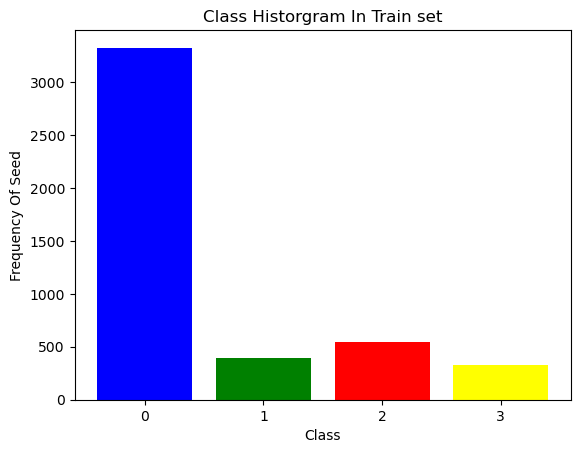

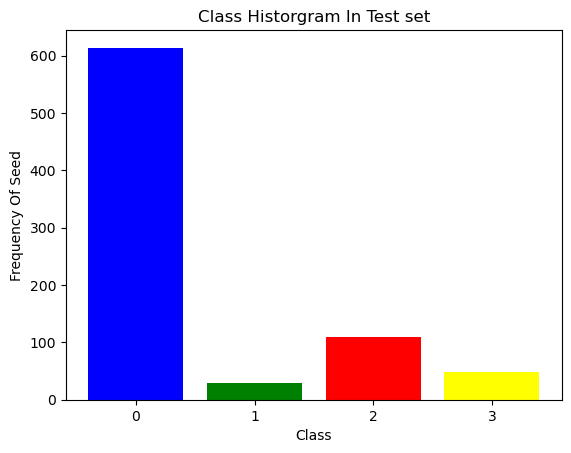

In [5]:
def seed_historgram(canola_grades , str_set):
    x = list(canola_grades.keys())
    y = list(canola_grades.values())

    colors = ['blue', 'green', 'red', 'yellow']
    plt.bar(x, y, color=colors)

    plt.xlabel('Class')
    plt.ylabel(f'Frequency Of Seed')
    plt.title(f'Class Historgram In {str_set} set')

    plt.xticks(x)  # Set x-axis ticks to match the values
    plt.show()
    

seed_historgram(canola_grades_train, 'Train')
seed_historgram(canola_grades_test, 'Test')

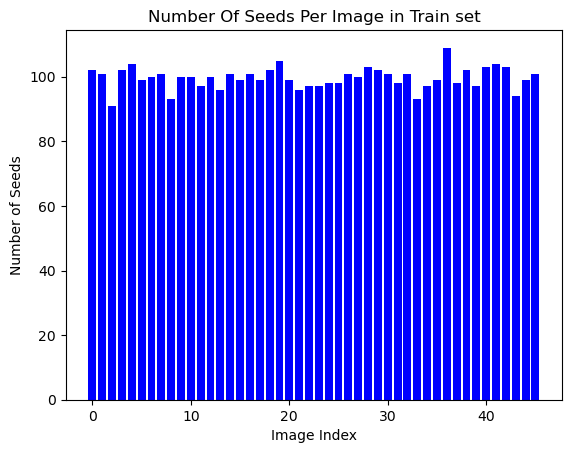

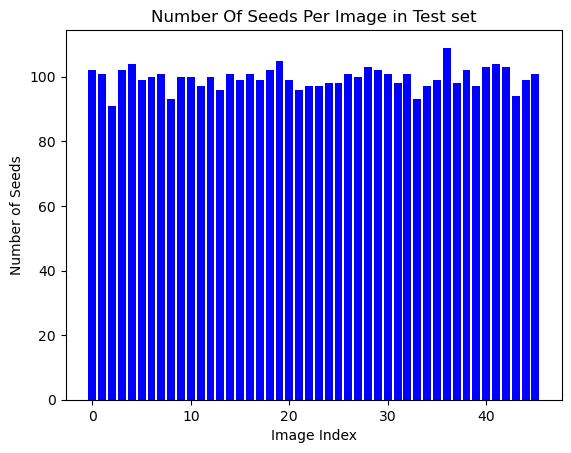

In [6]:
seed_num_train = [x.shape[0] for x in np_arry_train.values()]
seed_num_test = [x.shape[0] for x in np_arry_test.values()]


def number_of_seeds(seed_num, data_name):
    y = seed_num
    x = list(range(len(seed_num)))

    colors = ['blue']
    plt.bar(x, y, color=colors)

    plt.xlabel('Image Index')
    plt.ylabel('Number of Seeds')
    plt.title(f'Number Of Seeds Per Image in {data_name} set')

    plt.show()

number_of_seeds(seed_num_train, 'Train')
number_of_seeds(seed_num_train, 'Test')

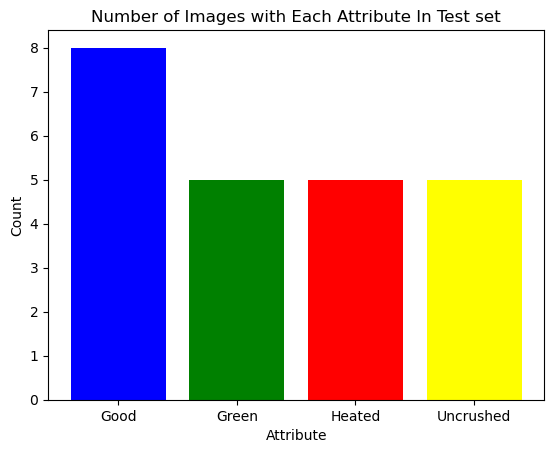

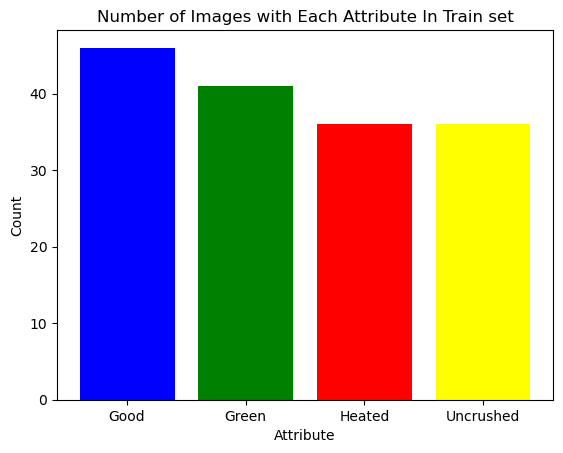

In [7]:
def image_with_att(np_arry, str_name):
    images_with_good = [int(x) for x in np_arry if 0 in np_arry[x][:,0]]
    images_with_green = [int(x) for x in np_arry if 1 in np_arry[x][:,0]]
    images_with_heated = [int(x) for x in np_arry if 2 in np_arry[x][:,0]]
    images_with_uncrushed = [int(x) for x in np_arry if 3 in np_arry[x][:,0]]
    images_with_tape = [ 2448, 2447, 2445]
    tape_on_tape = [2469, 2441]


    # Define the categories
    categories = ['Good', 'Green', 'Heated', 'Uncrushed']

    counts = [
        len(images_with_good),
        len(images_with_green),
        len(images_with_heated),
        len(images_with_uncrushed)
    ]

    # Plot the bar plot
    plt.bar(categories, counts, color=['blue', 'green', 'red', 'yellow'])
    plt.xlabel('Attribute')
    plt.ylabel('Count')
    plt.title(f'Number of Images with Each Attribute In {str_name} set')
    plt.show()
    
image_with_att(np_arry_test, 'Test')
image_with_att(np_arry_train, 'Train')
